In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker

#import packages 
import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
#import cartopy.crs as ccrs

#%matplotlib widget
%matplotlib inline

/Users/amandaworthy/opt/anaconda3/envs/uwgda2022/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
! pip install sentinelhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.4/244.4 KB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 KB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 1.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=dbba5645f1cd869aa3649ffacff8e1d314fe362884dae69a47b61672107eab1a
  Stored in directory: /Users/amandaworthy/Library/Caches/pip/wheels/75/f0/dd/39dfc9436520412399934d4a8566fe5c0cb8cc2568a1196057
Successfully built utm
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [4]:
from sentinelhub import DataCollection

In [5]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR
DataCollection.HARMONIZED_LANDSAT_SENTINEL


In [55]:
DataCollection.LANDSAT_OT_L1

<DataCollection.LANDSAT_OT_L1: DataCollectionDefinition(
  api_id: landsat-ot-l1
  catalog_id: landsat-ot-l1
  wfs_id: DSS12
  service_url: https://services-uswest2.sentinel-hub.com
  collection_type: Landsat 8 OLI and TIRS
  sensor_type: OLI-TIRS
  processing_level: L1
  bands: (Band(name='B01', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B02', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B03', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B04', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B05', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B06', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='B07', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,))

In [41]:
DataCollection.SENTINEL3_SLSTR

<DataCollection.SENTINEL3_SLSTR: DataCollectionDefinition(
  api_id: sentinel-3-slstr
  catalog_id: sentinel-3-slstr
  wfs_id: DSS9
  service_url: https://creodias.sentinel-hub.com
  collection_type: Sentinel-3
  sensor_type: SLSTR
  processing_level: L1B
  bands: (Band(name='S1', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S2', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S3', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S4', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S5', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S6', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>,), output_types=(<class 'numpy.float32'>,)), Band(name='S7', units=(<Unit.BRIGHTNESS_TEMPERATURE: 'BRIGHTNESS_TEMPERATURE'>,), output_types=(<class 'numpy.float32'>,))

The Sentinel-3 Level-2 SLSTR LST algorithm (see the LST ATBD) uses a nadir-only split-window approach
(Ghent et al., 2017). Split-window algorithms correct for atmospheric effects using the differential
absorption in two (or more) IR bands within the same atmospheric window (band of relatively high
atmospheric transmittance). In the case of Sentinel-3 the algorithm uses the S8 and S9 channels for the
nadir view.

In [59]:
from sentinelhub import CRS, BBox, MimeType, SentinelHubRequest, SHConfig

# Write your credentials here if you haven't already put them into config.toml
CLIENT_ID = "5e39c7fc-4dc5-47da-bd29-7c85a782c4da"
CLIENT_SECRET = "OQ+3I,iFRp*GB:?K5u{Dpf3{<4SF:h<D+&#x4y]}"

config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET


# Columbia Glacier, Alaska
glacier_bbox = BBox((-122.5, 47.3, -122, 47.8), crs=CRS.WGS84)
glacier_size = (700, 466)
time_interval = "2022-06-15", "2022-07-15"

evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["QA_RADSAT", "B10"]
        }],
        output: {
            bands: 1
        }
    };
}

function evaluatePixel(sample) {
    return [sample.QA, sample.B10];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.LANDSAT_OT_L1,
            time_interval=time_interval,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config,
)

image = request.get_data()[0]

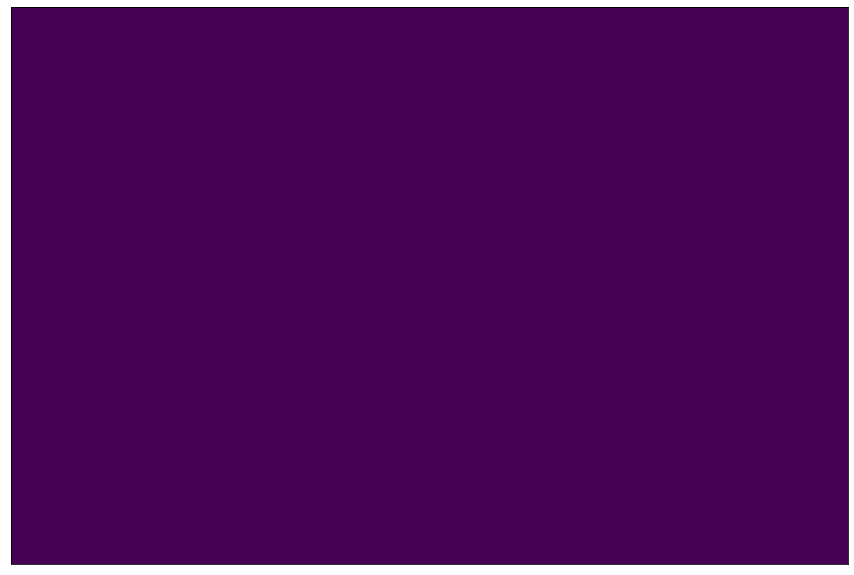

In [60]:
%matplotlib inline
from typing import Any, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np


def plot_image(
    image: np.ndarray, factor: float = 1.0, clip_range: Optional[Tuple[float, float]] = None, **kwargs: Any
) -> None:
    """Utility function for plotting RGB images."""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    



plot_image(image, factor=3.5 / 255, clip_range=(0, 1))